In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    
    #Taking only TOT
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    
    #Making pivot table where index is country and value is GDP
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    
    #Renaming Column name
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    
    #Setting index to country name
    gdp_per_capita.set_index("Country", inplace=True)
    
    #mergning dataframe on index
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    #Sorting value based on GDP
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    
    #Keeping only few countries for simplicity
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [3]:
import os
datapath = os.path.join("Data", "")
print(datapath)

Data/


In [4]:
# To plot pretty figures directly within Jupyter
import matplotlib as mpl

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [5]:
# Download the data
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"

#Creating Data Folder if does not exist
os.makedirs(datapath, exist_ok=True)

for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    
    #defining source url
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    
    #downloading from source to destination (datapath)
    urllib.request.urlretrieve(url, datapath + filename)

In [6]:
# Load the data
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')

gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

In [8]:
oecd_bli.head(2)

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN


In [10]:
gdp_per_capita.head(4)

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0


In [11]:
# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)

In [12]:
country_stats.head()

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1


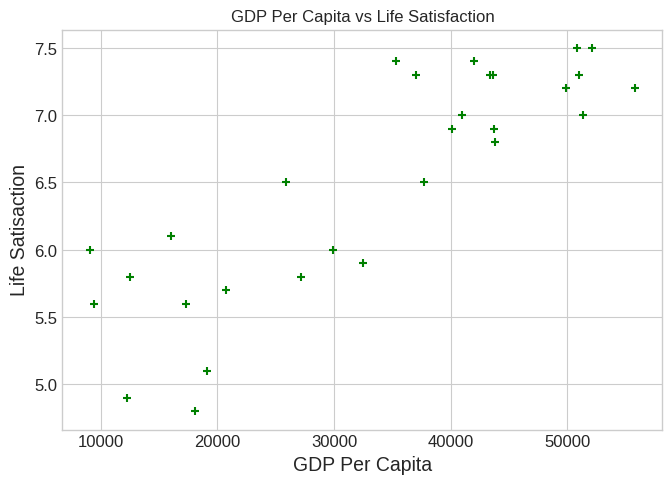

In [18]:
plt.style.use('seaborn-whitegrid')

fig = plt.figure(dpi = 100)
ax = fig.add_axes([1,1,1,1])

ax.scatter(x = country_stats['GDP per capita'],
           y = country_stats['Life satisfaction'],color = 'green',marker = '+')
ax.set(xlabel = 'GDP Per Capita',ylabel = 'Life Satisaction',
      title = 'GDP Per Capita vs Life Satisfaction');

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
model_lr = LinearRegression()

X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

In [21]:
model_lr.fit(X,y)

LinearRegression()

In [22]:
pred_lr = model_lr.predict(X)

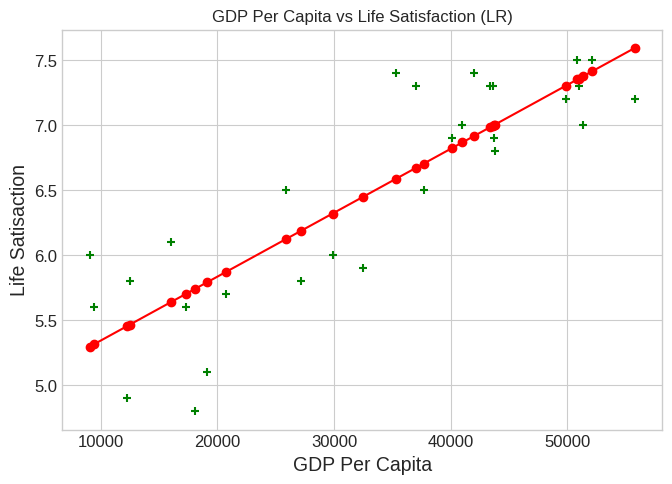

In [33]:
plt.style.use('seaborn-whitegrid')

fig = plt.figure(dpi = 100)
ax = fig.add_axes([1,1,1,1])

ax.scatter(x = country_stats['GDP per capita'],
           y = country_stats['Life satisfaction'],color = 'green',marker = '+')

ax.plot(country_stats['GDP per capita'],
           pred_lr,color = 'red',marker = 'o')

ax.set(xlabel = 'GDP Per Capita',ylabel = 'Life Satisaction',
      title = 'GDP Per Capita vs Life Satisfaction (LR)');

In [28]:
from sklearn.neighbors import KNeighborsRegressor

In [38]:
model_knr = KNeighborsRegressor(n_neighbors=5)

In [39]:
model_knr.fit(X,y)

KNeighborsRegressor()

In [40]:
pred_knr = model_knr.predict(X)

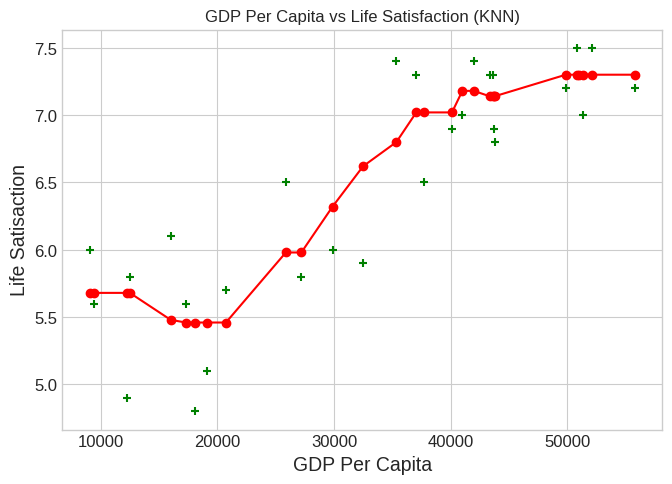

In [41]:
plt.style.use('seaborn-whitegrid')

fig = plt.figure(dpi = 100)
ax = fig.add_axes([1,1,1,1])

ax.scatter(x = country_stats['GDP per capita'],
           y = country_stats['Life satisfaction'],color = 'green',marker = '+')

ax.plot(country_stats['GDP per capita'],
           pred_knr,color = 'red',marker = 'o')

ax.set(xlabel = 'GDP Per Capita',ylabel = 'Life Satisaction',
      title = 'GDP Per Capita vs Life Satisfaction (KNN)');